In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk

In [2]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
print('Rows count: ', len(df))

# 299 istanze nel dataset

Rows count:  299


In [3]:
print('Missing values: ', df.isnull().values.any())

# Non ci sono missing values, il dataset è completo

Missing values:  False


In [4]:
print(df['DEATH_EVENT'].value_counts())

# Il dataset non è bilanciato, ci sono più istanze di persone che non sono morte

0    203
1     96
Name: DEATH_EVENT, dtype: int64


(array([15., 22.,  6., 31., 19., 20., 16., 39., 16., 30., 33.,  7., 15.,
         4.,  9.,  3.,  7.,  1.,  3.,  3.]),
 array([40.  , 42.75, 45.5 , 48.25, 51.  , 53.75, 56.5 , 59.25, 62.  ,
        64.75, 67.5 , 70.25, 73.  , 75.75, 78.5 , 81.25, 84.  , 86.75,
        89.5 , 92.25, 95.  ]),
 <BarContainer object of 20 artists>)

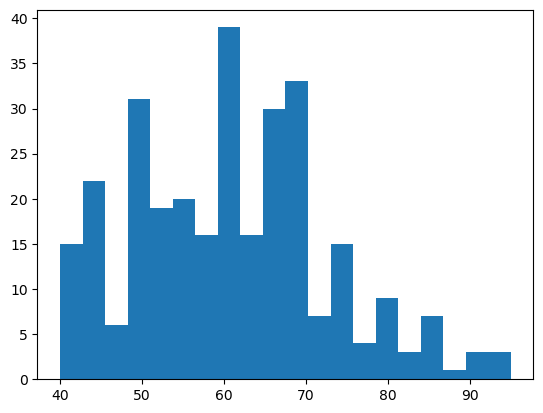

In [5]:
# Plot the age distribution
plt.hist(df['age'], bins=20)

# No, la maggior parte dei pazienti ha un'età compresa tra 50 e 70 anni, non vi sono pazienti con un'età superiore a 90 anni ne minore di 40

sex  DEATH_EVENT
0    0              0.676190
     1              0.323810
1    0              0.680412
     1              0.319588
Name: DEATH_EVENT, dtype: float64


<Axes: xlabel='sex'>

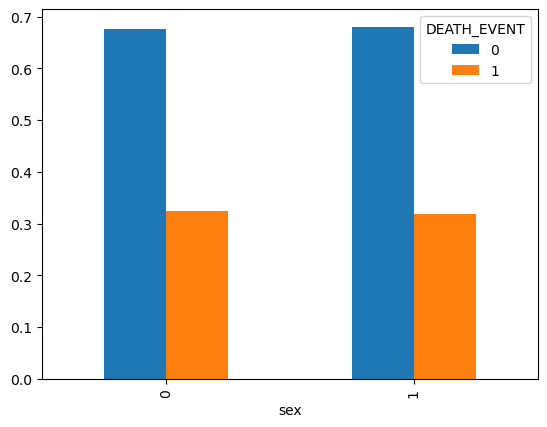

In [6]:
# Calculate the "DEATH_EVENT" distribution along the "sex" feature
dist = df.groupby("sex")["DEATH_EVENT"].value_counts(normalize=True)
print(dist)

# Plot the distribution
dist.unstack().plot.bar()

# La distribuzione di eventi "DEATH_EVENT" è simile tra i due sessi


In [7]:
# Create a pivot table to show the "DEATH_EVENT" from df considering on the rows the "age" feature, divided in 5 bins, and on the columns the "sex" and "smoking" features
age_bins = pd.cut(df['age'], bins=5)

# Create the pivot table
pivot_table = pd.pivot_table(df, values = "DEATH_EVENT", index = age_bins, columns = ["sex", "smoking"], aggfunc = np.sum, fill_value = 0)
print(pivot_table)

sex              0     1    
smoking          0  1  0   1
age                         
(39.945, 51.0]   8  1  9   2
(51.0, 62.0]    10  1  7   8
(62.0, 73.0]     8  1  6  10
(73.0, 84.0]     3  0  8   4
(84.0, 95.0]     2  0  5   3


In [8]:
# Check if the features "anemia" and "diabetes" are related
print(df.groupby("diabetes")["anaemia"].value_counts(normalize=True))

# No, le due feature non sono correlate in quanto la distribuzione di "anaemia" è simile tra i due valori di "diabetes"

diabetes  anaemia
0         0          0.563218
          1          0.436782
1         0          0.576000
          1          0.424000
Name: anaemia, dtype: float64


<Axes: ylabel='Frequency'>

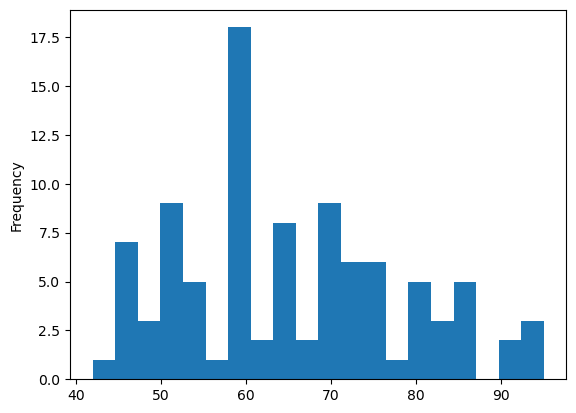

In [9]:
# Considering the dataframe df that has the columns "age" and "DEATH_EVENT" among others, plot the frequency analysis of "DEATH_EVENT" = True along the "age" feature
df[df["DEATH_EVENT"] == True]["age"].plot.hist(bins = 20)

# L'analisi mostra un maggior rischio nella fascia di età compresa tra 50 e 70 anni, con un picco pronunciato inotro ai 60 anni

Decision Tree - Test:  0.8777777777777778
Decision Tree - Train:  1.0
Logistic Regression - Test:  0.8666666666666667
Logistic Regression - Train:  0.8038277511961722
Dummy Classifier - Test:  0.6777777777777778
Dummy Classifier - Train:  0.6794258373205742


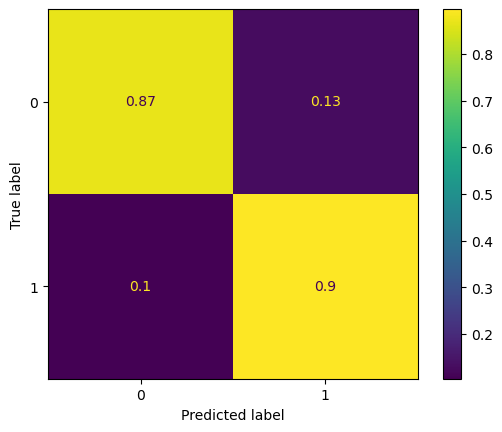

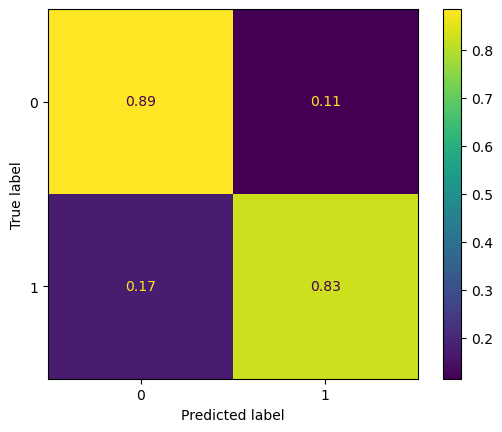

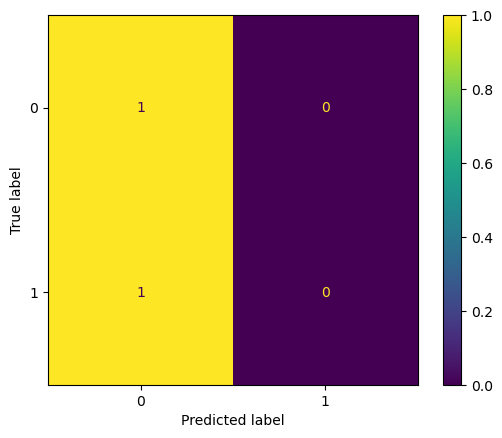

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

X = df.drop("DEATH_EVENT", axis = 1)
y = df["DEATH_EVENT"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y)

# Decision Tree
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

print("Decision Tree - Test: ", accuracy_score(y_test, y_test_pred))
print("Decision Tree - Train: ", accuracy_score(y_train, y_train_pred))

cm = confusion_matrix(y_test, y_test_pred, normalize='true')
cm_display = ConfusionMatrixDisplay(cm).plot()

# Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

print("Logistic Regression - Test: ", accuracy_score(y_test, y_test_pred))
print("Logistic Regression - Train: ", accuracy_score(y_train, y_train_pred))

cm = confusion_matrix(y_test, y_test_pred, normalize='true')
cm_display = ConfusionMatrixDisplay(cm).plot()

# Dummy Classifier
model = DummyClassifier()
model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

print("Dummy Classifier - Test: ", accuracy_score(y_test, y_test_pred))
print("Dummy Classifier - Train: ", accuracy_score(y_train, y_train_pred))

cm = confusion_matrix(y_test, y_test_pred, normalize='true')
cm_display = ConfusionMatrixDisplay(cm).plot()

# Decision Tree e Logistic Regression hanno un'accuratezza simile ed entrambi distribuiscono uniformemente gli errori tra False Positive e False Negative
# Ovviamente il Dummy Classifier ha un'accuratezza molto più bassa e distribuisce gli errori solo su False Positive
# Dall'accuratezza sul test set si può dedurre che il Decision Tree overfitta mentre la logistic regression no


In [11]:
# Repeat the previous task using 5-fold cross validation, print the mean accuracy
from sklearn.model_selection import cross_val_score

model = DecisionTreeClassifier()
scores = cross_val_score(model, X, y, cv = 5)
print("Decision Tree - Mean accuracy: ", scores.mean())

model = LogisticRegression()
scores = cross_val_score(model, X, y, cv = 5)
print("Logistic Regression - Mean accuracy: ", scores.mean())

model = DummyClassifier()
scores = cross_val_score(model, X, y, cv = 5)
print("Dummy Classifier - Mean accuracy: ", scores.mean())

# L'accuratezza media è minore, quindi nel caso precedente c'era overfitting, specialmente nel caso del Decision Tree

Decision Tree - Mean accuracy:  0.6254802259887006
Logistic Regression - Mean accuracy:  0.7822598870056497
Dummy Classifier - Mean accuracy:  0.6789265536723164


/home/lorenzo/miniconda3/envs/BDA/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/lorenzo/miniconda3/envs/BDA/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

In [12]:
from sklearn.preprocessing import MinMaxScaler, Normalizer, KBinsDiscretizer
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.compose import ColumnTransformer

# Considering the original dataset df, create a new dataset df2 without the attribute "time"
df2 = df.drop("time", axis = 1)

# Scale all the values between 0 and 1


scaler = MinMaxScaler()
df2 = pd.DataFrame(scaler.fit_transform(df2), columns = df2.columns)

# Train a linear regression model to predict the "DEATH_EVENT" from df2


X = df2.drop("DEATH_EVENT", axis = 1)
y = df2["DEATH_EVENT"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

model = LinearRegression()
model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)

# Print the accuracy of the model
print("Linear Regression - Test: ", accuracy_score(y_test, y_test_pred.round()))

# Considering the model trained in the previous task, select the 5 most important features
selector = SelectKBest(f_regression, k = 5)
selector.fit(X_train, y_train)

X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Use 5-fold cross validation with a Decision Tree to predict the "DEATH_EVENT" from the 5 selected features
model = DecisionTreeClassifier()
scores = cross_val_score(model, X_train_selected, y_train, cv = 5)
print("Decision Tree - Mean accuracy: ", scores.mean())

# L'accuratezza media sui 5-fold è maggiore utilizzando solo le 5 features più importanti rispetto a quanto non fosse con tutto il dataset
# Questo significa che le altre features non sono utili per la predizione


Linear Regression - Test:  0.6777777777777778
Decision Tree - Mean accuracy:  0.6219512195121951


In [13]:
# Considering the original dataset df, create a new dataset df3 without the attribute "time"
df3 = df.drop("time", axis = 1)

# Define the normalizer, the scaler and the discretizer
normalizer = Normalizer()
scaler = MinMaxScaler()
discretizer = KBinsDiscretizer(n_bins = 6, encode = 'ordinal', strategy = 'uniform')

# Apply the normalizer, the scaler and the discretizer to the dataset df3
prep = ColumnTransformer(transformers = [
    ('norm', normalizer, ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']),
    ("scale", scaler, ["age", 'creatinine_phosphokinase', "platelets", 'ejection_fraction', 'serum_creatinine', 'serum_sodium']),
    ("disc", discretizer, ['age', 'platelets'])
])

# Defime the pipeline
from sklearn.pipeline import Pipeline
model = DecisionTreeClassifier()
pipeline = Pipeline(steps = [("preprocessing", prep), ("model", model)])

# Train a Decision Tree to predict the "DEATH_EVENT" from df3
X = df3.drop("DEATH_EVENT", axis = 1)
y = df3["DEATH_EVENT"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

pipeline.fit(X_train, y_train)

y_test_pred = pipeline.predict(X_test)
y_train_pred = pipeline.predict(X_train)

print("Decision Tree - Test: ", accuracy_score(y_test, y_test_pred))
print("Decision Tree - Train: ", accuracy_score(y_train, y_train_pred))

Decision Tree - Test:  0.7777777777777778
Decision Tree - Train:  1.0


In [14]:
# Considering the original dataset df, create a new dataset df3 without the attribute "time"
df3 = df.drop("time", axis = 1)

# Define the normalizer, the scaler and the discretizer
normalizer = Normalizer()
scaler = MinMaxScaler()
discretizer = KBinsDiscretizer(n_bins = 6, encode = 'ordinal', strategy = 'uniform')

# Apply the normalizer, the scaler and the discretizer to the dataset df3
prep = ColumnTransformer(transformers = [
    ('norm', normalizer, ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']),
    ("scale", scaler, ["age", 'creatinine_phosphokinase', "platelets", 'ejection_fraction', 'serum_creatinine', 'serum_sodium']),
    ("disc", discretizer, ['age', 'platelets'])
], remainder = 'passthrough')

# Defime the pipeline
from sklearn.pipeline import Pipeline
model = DecisionTreeClassifier()
pipeline = Pipeline(steps = [("preprocessing", prep), ("model", model)])

# Train a Decision Tree to predict the "DEATH_EVENT" from df3
X = df3.drop("DEATH_EVENT", axis = 1)
y = df3["DEATH_EVENT"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

pipeline.fit(X_train, y_train)

y_test_pred = pipeline.predict(X_test)
y_train_pred = pipeline.predict(X_train)

print("Decision Tree - Test: ", accuracy_score(y_test, y_test_pred))
print("Decision Tree - Train: ", accuracy_score(y_train, y_train_pred))

Decision Tree - Test:  0.7444444444444445
Decision Tree - Train:  1.0


In [15]:
# Define the optimizer
from sklearn.model_selection import GridSearchCV

param_grid = {
    "model__criterion": ["gini", "entropy"],
    "model__max_depth": [5, 6, 7, 8, 9, 10],
    "preprocessing__disc__n_bins": [4, 6, 8, 10],
    "preprocessing__disc__strategy": ["uniform", "quantile", "kmeans"]
}

grid_search = GridSearchCV(pipeline, param_grid, cv = 10)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

# Train a Decision Tree to predict the "DEATH_EVENT" from df3 using the best parameters found
pipeline.set_params(**grid_search.best_params_)

pipeline.fit(X_train, y_train)

y_test_pred = pipeline.predict(X_test)
y_train_pred = pipeline.predict(X_train)

print("Decision Tree - Test: ", accuracy_score(y_test, y_test_pred))
print("Decision Tree - Train: ", accuracy_score(y_train, y_train_pred))

# L'accuratezza è aumentata, quindi i parametri trovati sono migliori di quelli di default

{'model__criterion': 'gini', 'model__max_depth': 5, 'preprocessing__disc__n_bins': 4, 'preprocessing__disc__strategy': 'uniform'}
Decision Tree - Test:  0.7888888888888889
Decision Tree - Train:  0.8755980861244019


In [16]:
# Apply the PCA to the dataset and SelectKBest to select the 5 most important features
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import FunctionTransformer

df3 = df.drop("time", axis = 1)

# Define the normalizer, the scaler and the discretizer
normalizer = Normalizer()
scaler = MinMaxScaler()
discretizer = KBinsDiscretizer(n_bins = 6, encode = 'ordinal', strategy = 'uniform')

# Apply the normalizer, the scaler and the discretizer to the dataset df3
prep = ColumnTransformer(transformers = [
    ('norm', normalizer, ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']),
    ("scale", scaler, ["age", 'creatinine_phosphokinase', "platelets", 'ejection_fraction', 'serum_creatinine', 'serum_sodium']),
    ("disc", discretizer, ['age', 'platelets'])
], remainder = 'passthrough')

# Defime the pipeline
from sklearn.pipeline import Pipeline
model = DecisionTreeClassifier()
pipeline = Pipeline(steps = [("preprocessing", prep), ("model", model)])

X = df3.drop("DEATH_EVENT", axis = 1)
y = df3["DEATH_EVENT"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y)

# Define the PCA
pca = PCA(n_components = 2)

# Define the SelectKBest
selector = SelectKBest(k = 2)

# Get the combined features from PCA, SelectKBest and the remaining features
combined_features = FeatureUnion([("pca", pca), ("select", selector), ("passthrough", FunctionTransformer(lambda x: x, validate = False))])

# Bundle the preprocessing and the model in a pipeline
pipeline = Pipeline(steps = [("preprocessing", prep), ("features", combined_features), ("model", model)])

# Fit the pipeline
pipeline.fit(X_train, y_train)

y_test_pred = pipeline.predict(X_test)
y_train_pred = pipeline.predict(X_train)

print("Decision Tree - Test: ", accuracy_score(y_test, y_test_pred))
print("Decision Tree - Train: ", accuracy_score(y_train, y_train_pred))

Decision Tree - Test:  0.7222222222222222
Decision Tree - Train:  1.0
